In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
#Load the dataset
data = "Cardekho.csv"
df =pd.read_csv(data)

# Check the first few rows of the dataset
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [7]:
# Check the shape of the data (rows and columns)
df.shape

(15411, 14)

In [8]:
# Data cleaning: Drop unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)


In [9]:
#Checking null values
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [10]:
# Checking Duplicate values
df.duplicated().sum()

np.int64(167)

In [11]:
# Statistical summary of numerical columns
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


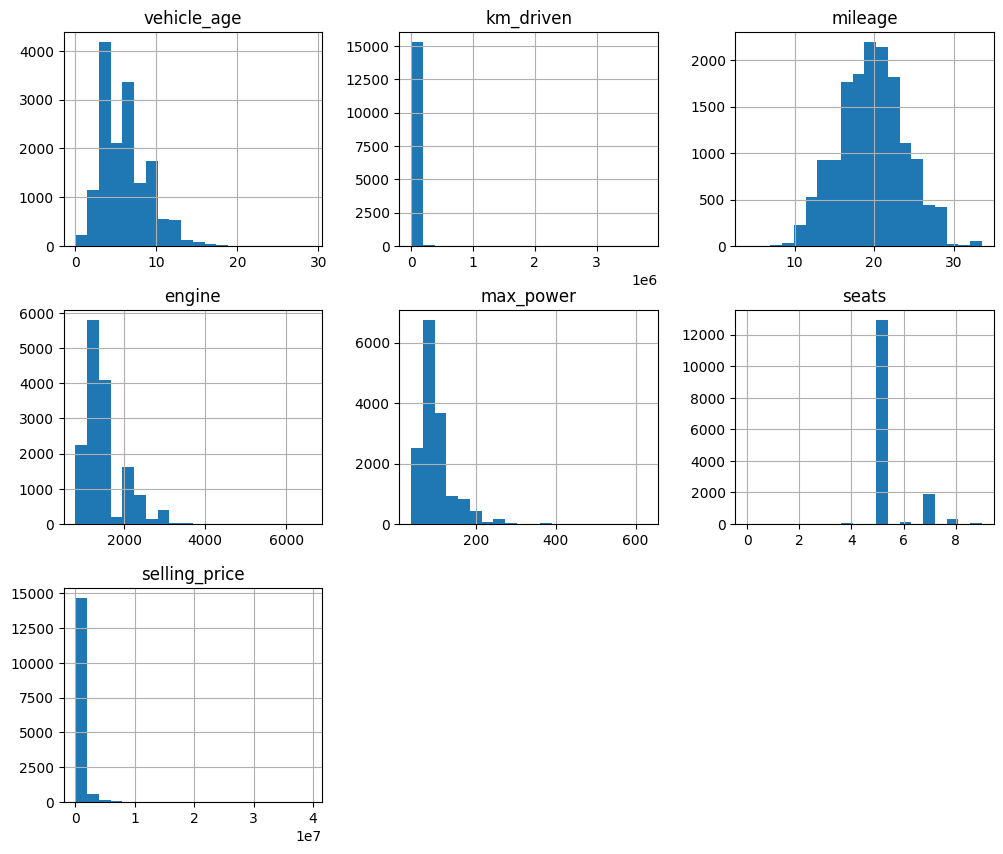

In [12]:
# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.show()

In [13]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

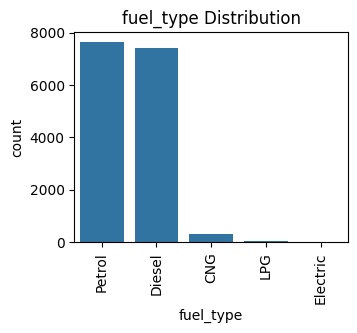

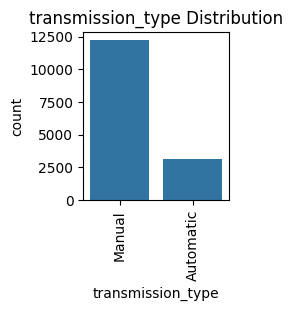

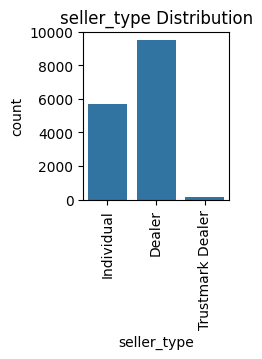

In [14]:
# Categorical features
categorical_features = ["fuel_type", "transmission_type", "seller_type"]
plt.figure(figsize=(12, 6))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, data=df) 
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation = 90)
    plt.show()

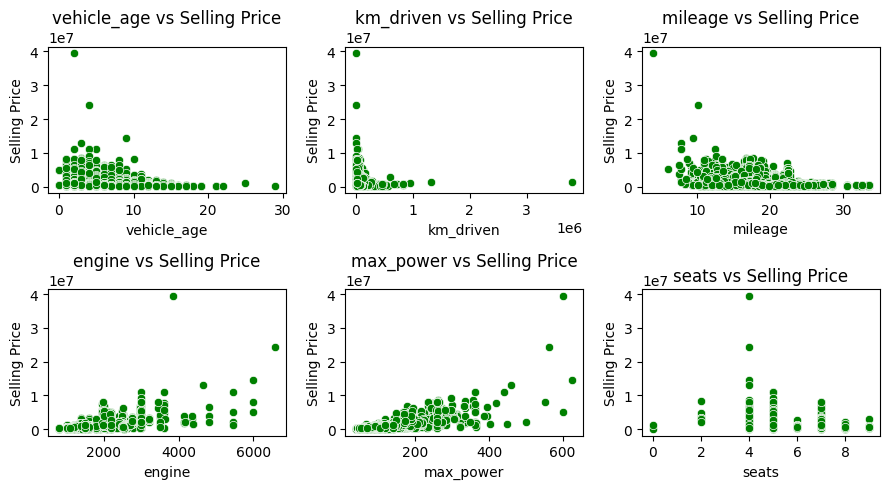

In [15]:
# Numerical features
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Create subplots for scatter plots
plt.figure(figsize=(9,5))

# Scatter plot for each numerical feature vs selling price
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['selling_price'], color='green')
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

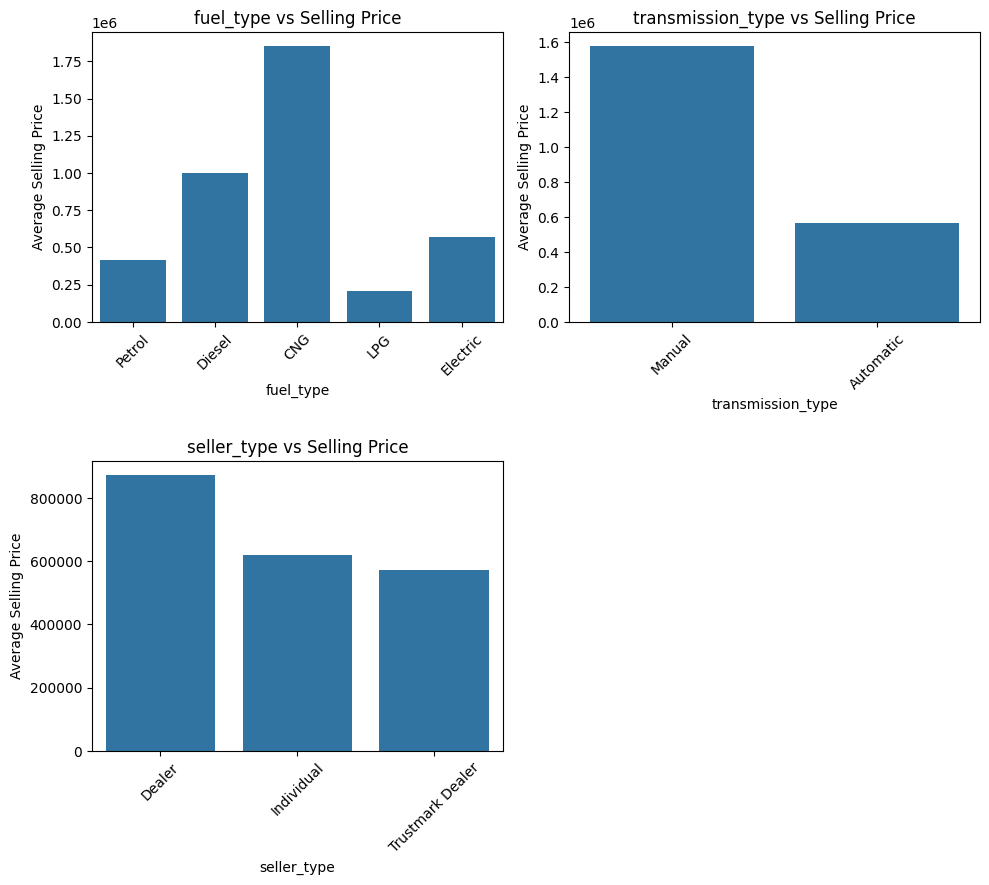

In [16]:
# Categorical features to analyze
categorical_features = ['fuel_type', 'transmission_type', 'seller_type']

# Set figure size for the plots
plt.figure(figsize=(10,12))

# Create subplots for bar plots of categorical features vs selling price
for i, feature in enumerate(categorical_features):
    plt.subplot(3,2, i +1)
    sns.barplot(x=df[feature].value_counts().index, 
                y=df.groupby(feature)['selling_price'].mean().values)
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
# List of numerical features you want to calculate correlation for
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Calculate the correlation matrix for selected numerical features
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

               vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age       1.000000   0.333891 -0.257394  0.098965   0.005208   
km_driven         0.333891   1.000000 -0.105239  0.192885   0.044421   
mileage          -0.257394  -0.105239  1.000000 -0.632987  -0.533128   
engine            0.098965   0.192885 -0.632987  1.000000   0.807368   
max_power         0.005208   0.044421 -0.533128  0.807368   1.000000   
seats             0.030791   0.192830 -0.440280  0.551236   0.172257   
selling_price    -0.241851  -0.080030 -0.305549  0.585844   0.750236   

                  seats  selling_price  
vehicle_age    0.030791      -0.241851  
km_driven      0.192830      -0.080030  
mileage       -0.440280      -0.305549  
engine         0.551236       0.585844  
max_power      0.172257       0.750236  
seats          1.000000       0.115033  
selling_price  0.115033       1.000000  


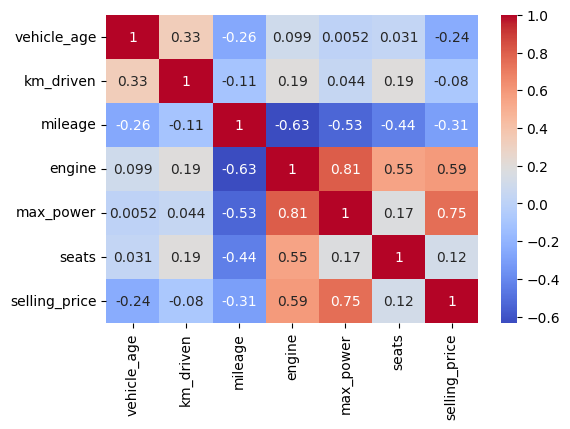

In [18]:
#Plot the heatmap for checking the correlation 
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
model_data = df.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [20]:
# Drop irrelevant columns
model_data.drop(labels = ['car_name','brand','model','seller_type'],axis = 1, inplace = True)

In [21]:
model_data = pd.get_dummies(model_data,dtype = float)
model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
# Define features (X) and target (Y)
X = model_data.drop('selling_price', axis=1)  # Independent variables
Y = model_data['selling_price']  # Target variable

In [23]:
# Split data into training (80%) and testing (20%) sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

print(f"Training set size: {train_X.shape}, Testing set size: {test_X.shape}")
X = model_data.drop('selling_price', axis = 1)

Training set size: (12328, 13), Testing set size: (3083, 13)


In [24]:
# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(train_X, train_Y)

# Predict on the test data
predictions = regressor.predict(test_X)

# Show the first few predicted values
print(predictions[:5])

[1002953.4048704   660352.26553146  902121.1742469  1013465.88162296
  470548.46743387]


In [25]:
print(test_Y)

6232      795000
8389      600000
10436     450000
11345     860000
3570      435000
          ...   
8901      470000
4371      745000
4888     3300000
11167     170000
15126     364000
Name: selling_price, Length: 3083, dtype: int64


In [26]:
test_X['predicted_sales_price'] = predictions

test_X['Actual_price'] = test_Y

test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']

In [27]:
test_X

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
6232,5,51321,21.66,1498,103.52,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.002953e+06,795000,2.079534e+05
8389,3,48000,28.40,1248,74.00,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.603523e+05,600000,6.035227e+04
10436,8,55000,17.01,1591,121.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9.021212e+05,450000,4.521212e+05
11345,3,42000,20.65,1462,103.25,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.013466e+06,860000,1.534659e+05
3570,8,37900,21.90,1396,88.80,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.705485e+05,435000,3.554847e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,8,44500,19.01,1462,103.26,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.691218e+05,470000,1.991218e+05
4371,3,61000,28.40,1248,74.02,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.613309e+05,745000,1.633090e+04
4888,5,16000,17.68,1968,174.33,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.091997e+06,3300000,-1.208003e+06
11167,14,65000,22.00,1197,81.80,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-6.938441e+04,170000,-2.393844e+05


In [28]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_Y,predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 188724007599.34326
Root Mean Squared Error (RMSE): 434423.7650029557
R-squared: 0.6946998653835854


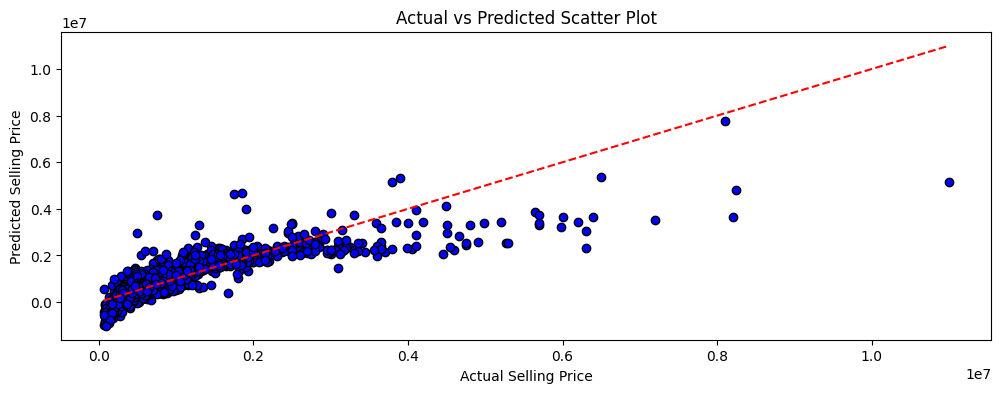

In [29]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(test_Y, predictions, color='blue',edgecolor='black')
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

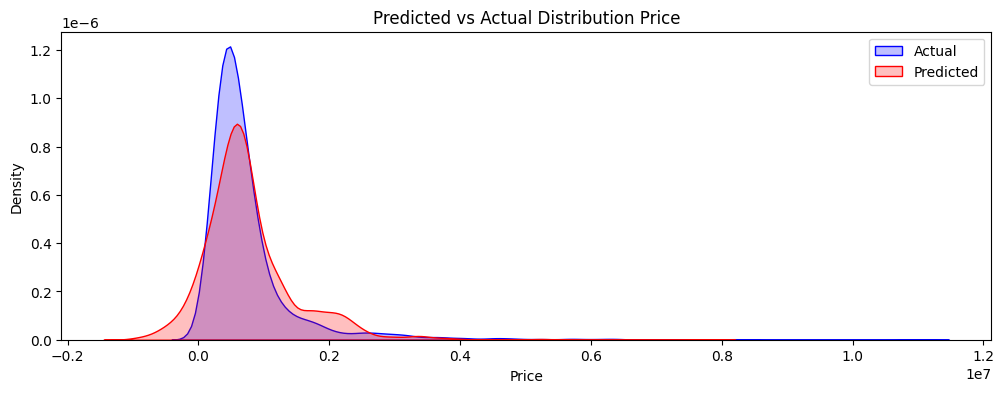

In [30]:
# Plotting Actual vs Predicted Distribution Price
plt.figure(figsize=(12,4))
sns.kdeplot(test_Y, color='blue', label='Actual', fill=True)
sns.kdeplot(predictions, color='red', label='Predicted', fill=True)
plt.title('Predicted vs Actual Distribution Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()